In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 4.1.3 Least squares for classifiction

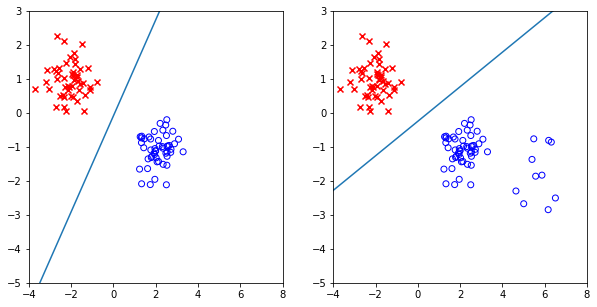

In [13]:
X1 = np.random.multivariate_normal([2, -1], .3*np.eye(2), 50)
X2 = np.random.multivariate_normal([-2, 1], .3*np.eye(2), 50)
X3 = np.random.multivariate_normal([6, -2], .4*np.eye(2), 10)
Y = np.r_[np.ones(50), -np.ones(50)].reshape(-1,1)
X = np.r_[X1, X2]
X = np.c_[np.ones(100), X]

plt.figure(figsize=[10, 5])
plt.subplot(1, 2, 1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', color='', edgecolors='blue')
plt.scatter(X2[:, 0], X2[:, 1], marker='x', color='red')
plt.xlim(-4, 8)
plt.ylim(-5, 3)
# plt.gca().set_aspect('equal', adjustable='box')

w = np.linalg.pinv(X.T@X)@X.T@Y
plt.plot(np.linspace(-4, 8, 100), -(w[1]*np.linspace(-4, 8, 100) + w[0])/w[2])

Y = np.r_[np.ones(60), -np.ones(50)].reshape(-1, 1)
X = np.r_[X1, X3, X2]
X = np.c_[np.ones(110), X]
plt.subplot(1, 2, 2)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', color='', edgecolors='blue')
plt.scatter(X2[:, 0], X2[:, 1], marker='x', color='red')
plt.scatter(X3[:, 0], X3[:, 1], marker='o', color='', edgecolors='blue')
plt.xlim(-4, 8)
plt.ylim(-5, 3)

w = np.linalg.pinv(X.T@X)@X.T@Y
plt.plot(np.linspace(-4, 8, 100), -(w[1]*np.linspace(-4, 8, 100) + w[0])/w[2])

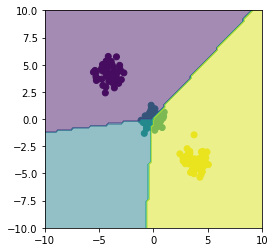

In [53]:
def prediction(X, W):
    y = X @ W
    return y.argmax(axis=1)

N1, N2, N3 = 50, 50, 50
train_X1 = np.random.multivariate_normal(np.array([-4, 4]), .4*np.eye(2), N1)
train_X2 = np.random.multivariate_normal(np.array([0, 0]), .4*np.eye(2), N2)
train_X3 = np.random.multivariate_normal(np.array([4, -4]), .4*np.eye(2), N3)
train_X = np.r_[train_X1, train_X2, train_X3]
train_y = np.r_[np.zeros(N1), np.ones(N2), 2*np.ones(N3)].reshape(-1, 1)
num_labels = train_y.shape[0]
num_classes = 3
index_offset = np.arange(num_labels) * num_classes
train_Y = np.zeros([num_labels, num_classes])
train_Y.flat[index_offset + train_y.astype(int).flatten()] = 1

plt.figure()
plt.scatter(train_X[:,0],train_X[:,1],c = train_y.flatten())

# train least square model for multi-class classification
train_X = np.c_[np.ones([N1+N2+N3,1]), train_X]
W = np.linalg.pinv(train_X.T@train_X)@train_X.T@train_Y

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, prediction(np.c_[np.ones([10000, 1]), X.reshape(-1,1), Y.reshape(-1,1)], W).reshape(100, 100), alpha = 0.5)
plt.gca().set_aspect('equal', adjustable='box')



# 4.1.4 Fisher's linear discriminant

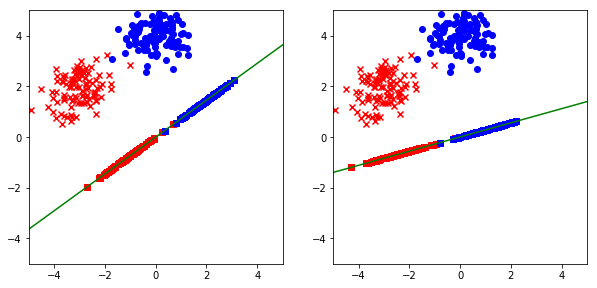

In [59]:
N1 = 100
X1 = np.random.multivariate_normal([-3, 2], .4*np.eye(2), N1)
N2 = 100
X2 = np.random.multivariate_normal([0, 4], .4*np.eye(2), N2)

m1 = X1.mean(axis=0, keepdims=True)
m2 = X2.mean(axis=0, keepdims=True)
Sb = (m2 - m1).T@(m2 - m1)

Sw = (X1 - m1).T@(X1 - m1) + (X2 - m2).T@(X2 - m2)
w = np.linalg.inv(Sw) @ (m2 - m1).T
w /= np.linalg.norm(w)

plt.figure(figsize=[10, 5])
plt.subplot(1, 2, 1)
plt.scatter(X1[:, 0], X1[:, 1], marker='x', color='red')
plt.scatter(X2[:, 0], X2[:, 1], marker='o', color='blue')
plt.plot(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100)*w[1]/w[0], c='green')

plt.scatter(X1@w*w[0], X1@w*w[1], marker='s', color='red')
plt.scatter(X2@w*w[0], X2@w*w[1], marker='s', color='blue')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect('equal', adjustable='box')

plt.subplot(1, 2, 2)
plt.scatter(X1[:, 0], X1[:, 1], marker='x', color='red')
plt.scatter(X2[:, 0], X2[:, 1], marker='o', color='blue')
z = np.random.uniform(0, 1, [2, 1])
z /= np.linalg.norm(z)
plt.plot(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100)*z[1]/z[0], c='green')

plt.scatter(X1@z*z[0], X1@z*z[1], marker='s', color='red')
plt.scatter(X2@z*z[0], X2@z*z[1], marker='s', color='blue')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect('equal', adjustable='box')

# 4.1.7 The perceptron algorithm

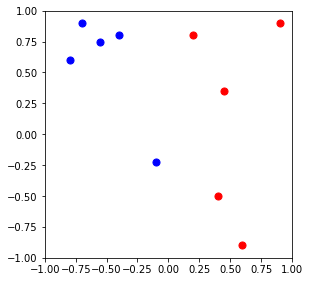

In [5]:
X = np.array([[-.8,.6],[-.7,.9],[-.55,.75],[-.4,.8],[-.1,-.9/4],[.2,.8],[.4,-.5],[.45,.35],[.6,-.9],[.9,.9]])
y = np.r_[-np.ones([5,1]), np.ones([5,1])]
plt.figure(figsize=[10,10])
plt.subplot(2,2,1)
plt.scatter(X[y.flatten() == 1, 0], X[y.flatten()==1,1], marker='o', c='red', s=50)
plt.scatter(X[y.flatten() == -1, 0], X[y.flatten()==-1,1], marker='o', c='blue', s=50)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.gca().set_aspect('equal', adjustable='box')
w = np.array([-.4,-.9])
# plt.plot(np.linspace(-1,1,100), np.)